In [333]:
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

In [334]:
import numpy as np

def gradient_descent(x, y, alpha=1, epsilon=0.001):
    n = x.shape[1]
    k = 1
    ones = np.ones((x.shape[0], 1))
    X = np.concatenate((ones,x), axis=1)  
    weight = np.random.randn(n + 1)
    previous_cost  = 0
    cost  = 0
    while True:
        y_predicted = X.dot(weight)
        error  = y_predicted - y
        L2 = np.sum(np.square(weight[1:]))
        cost = (1 / n) * np.sum(error  ** 2) + 2 * alpha * L2
        gradient = (2 / n) * X.T.dot(error) + alpha * weight
        lambd = 1 / k
        k = k + 1
        lg = lambd * gradient
        weight = weight - lg     

        if abs(cost - previous_cost) <= epsilon:
            break 
            
        previous_cost  = cost
    return weight

### Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning). Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии. При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

### Загрузка датасета. Целевой признак - price

In [335]:
import pandas as pd

df = pd.read_csv("car_price.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [337]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Пропущенные значения в датасете отсутствуют

In [338]:
df.shape

(205, 26)

Дублирующие записи не только искажают статистические показатели датасета, но и снижают качество обучения модели, потому удалим полные дублирующие вхождения.

In [339]:
df = df.drop_duplicates()
df.shape

(205, 26)

Дублирующие записи отсутствовали

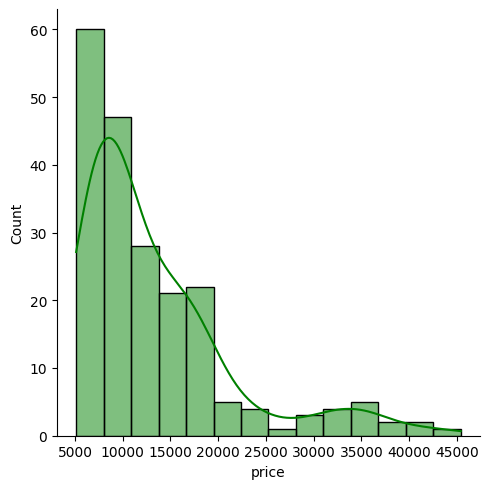

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=df, x="price", kde = True, color = 'g') 
plt.show()

Данный график показывает цену автомобилей. Большенство из них имеет цену ниже 15000

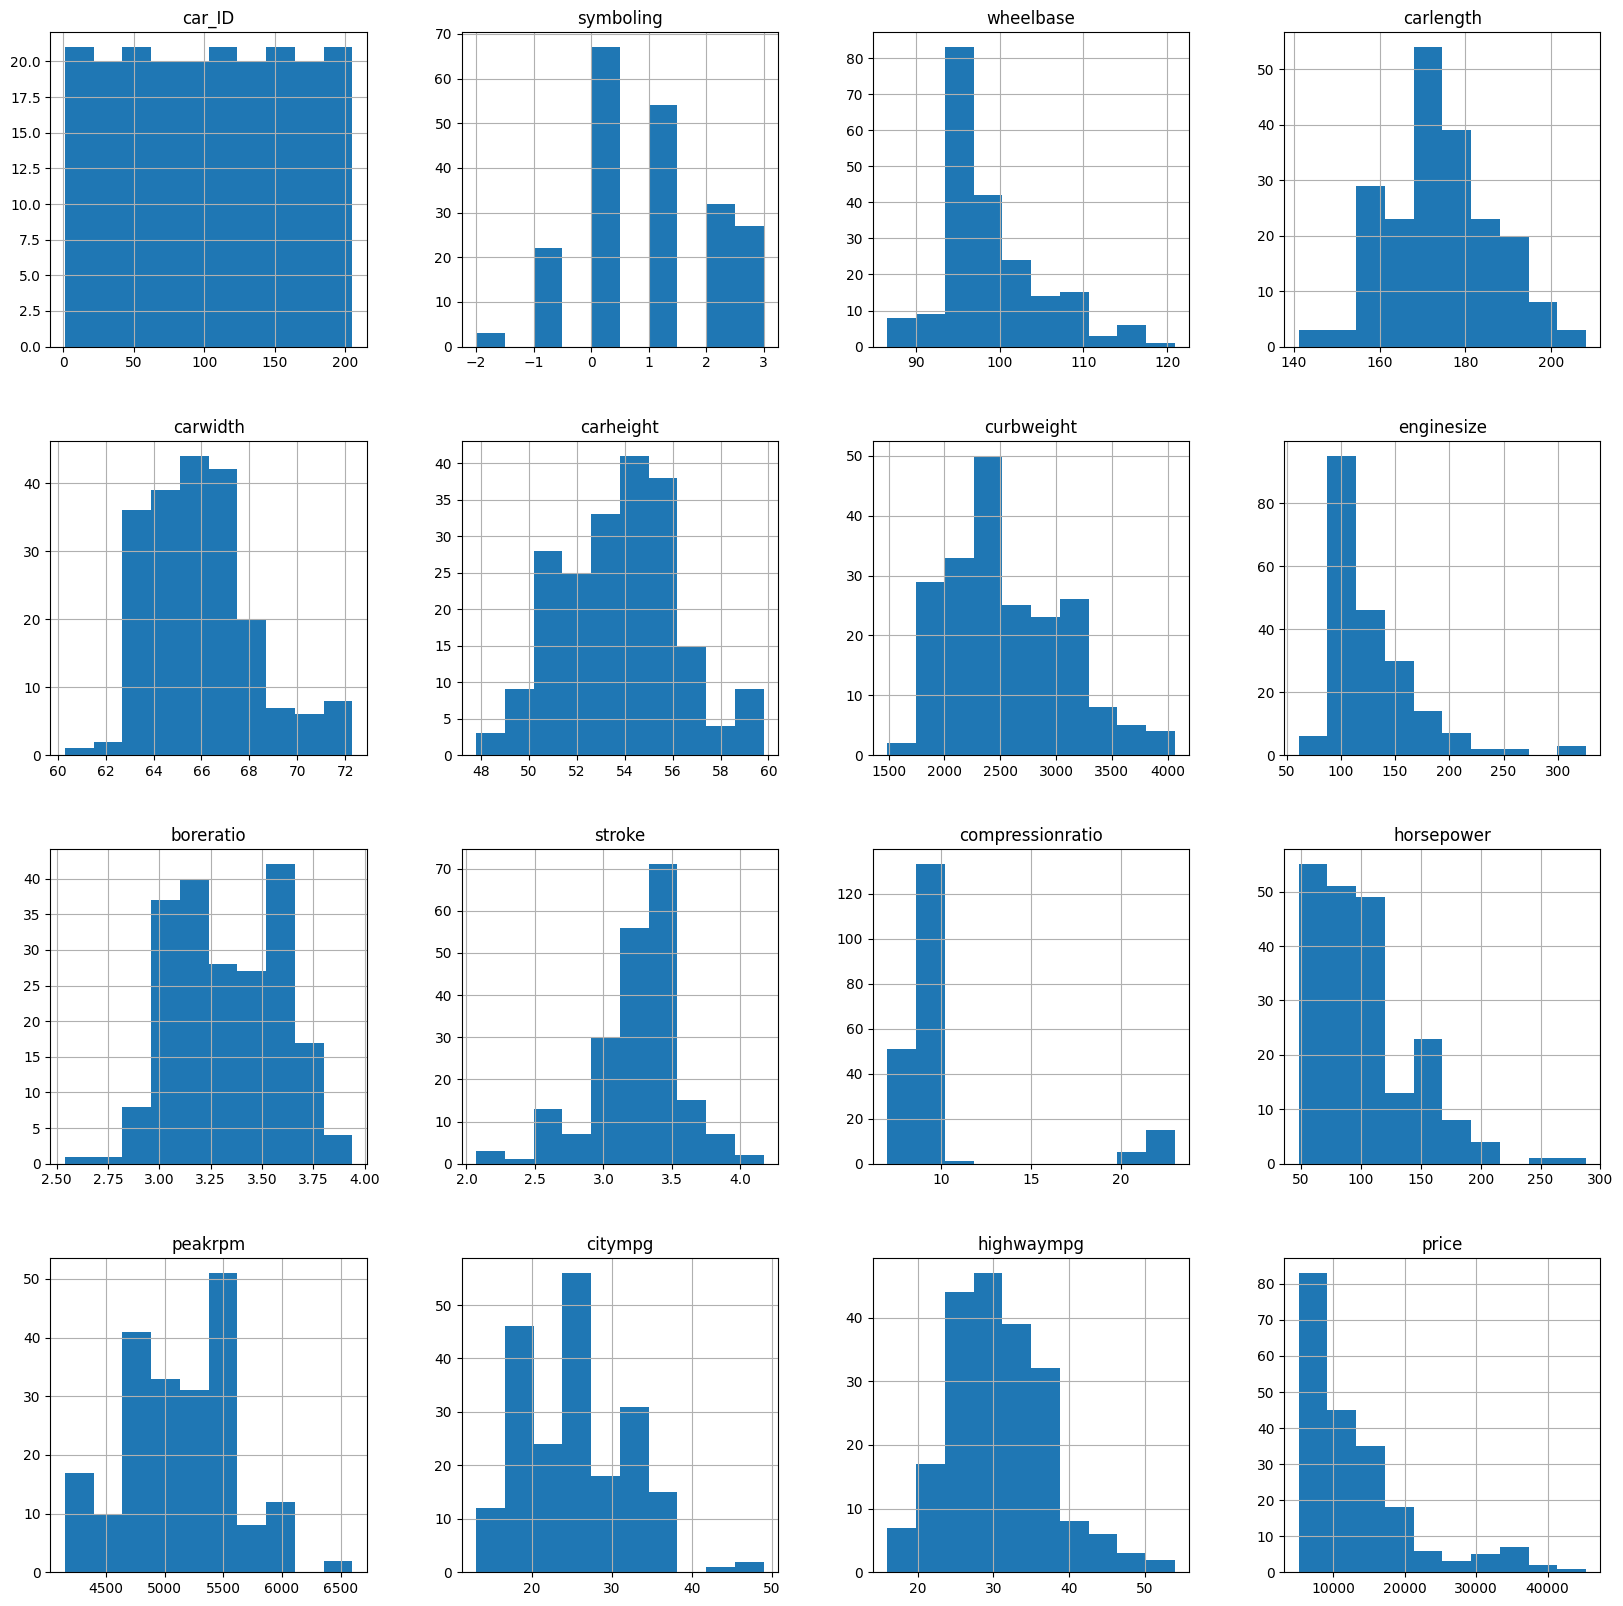

In [341]:
df.hist(figsize =(20,20));

Гистограмма по всем колличественных признакам

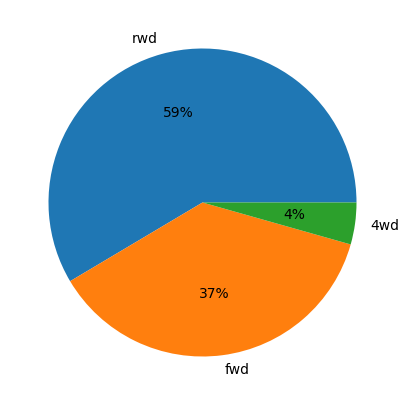

In [342]:
plt.figure(figsize=(5, 5))
plt.pie(df['drivewheel'].value_counts(), labels = df['drivewheel'].unique(), autopct='%.0f%%');

Процентное соотношение привода у автомобилей.Больше всего заднеприводных автомобилей(59%), 37% переднеприводных и всего 4% автомобилей с полным приводом. 

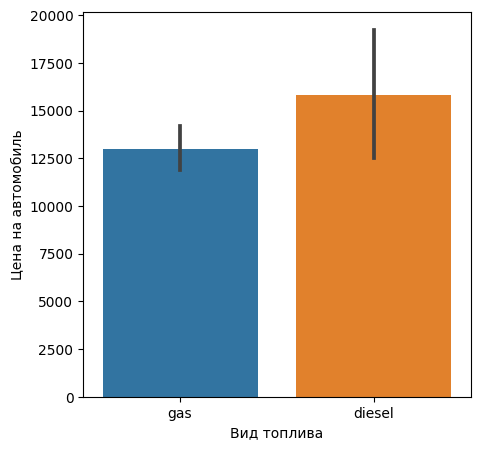

In [343]:
%matplotlib inline

plt.figure(figsize=(5, 5))
sns.barplot(data=df, x="fueltype", y="price")
plt.ylabel('Цена на автомобиль');
plt.xlabel('Вид топлива');

Цены на автомобили с учетом вида топлива. Автомобили на дизельном топливе стоят дороже.

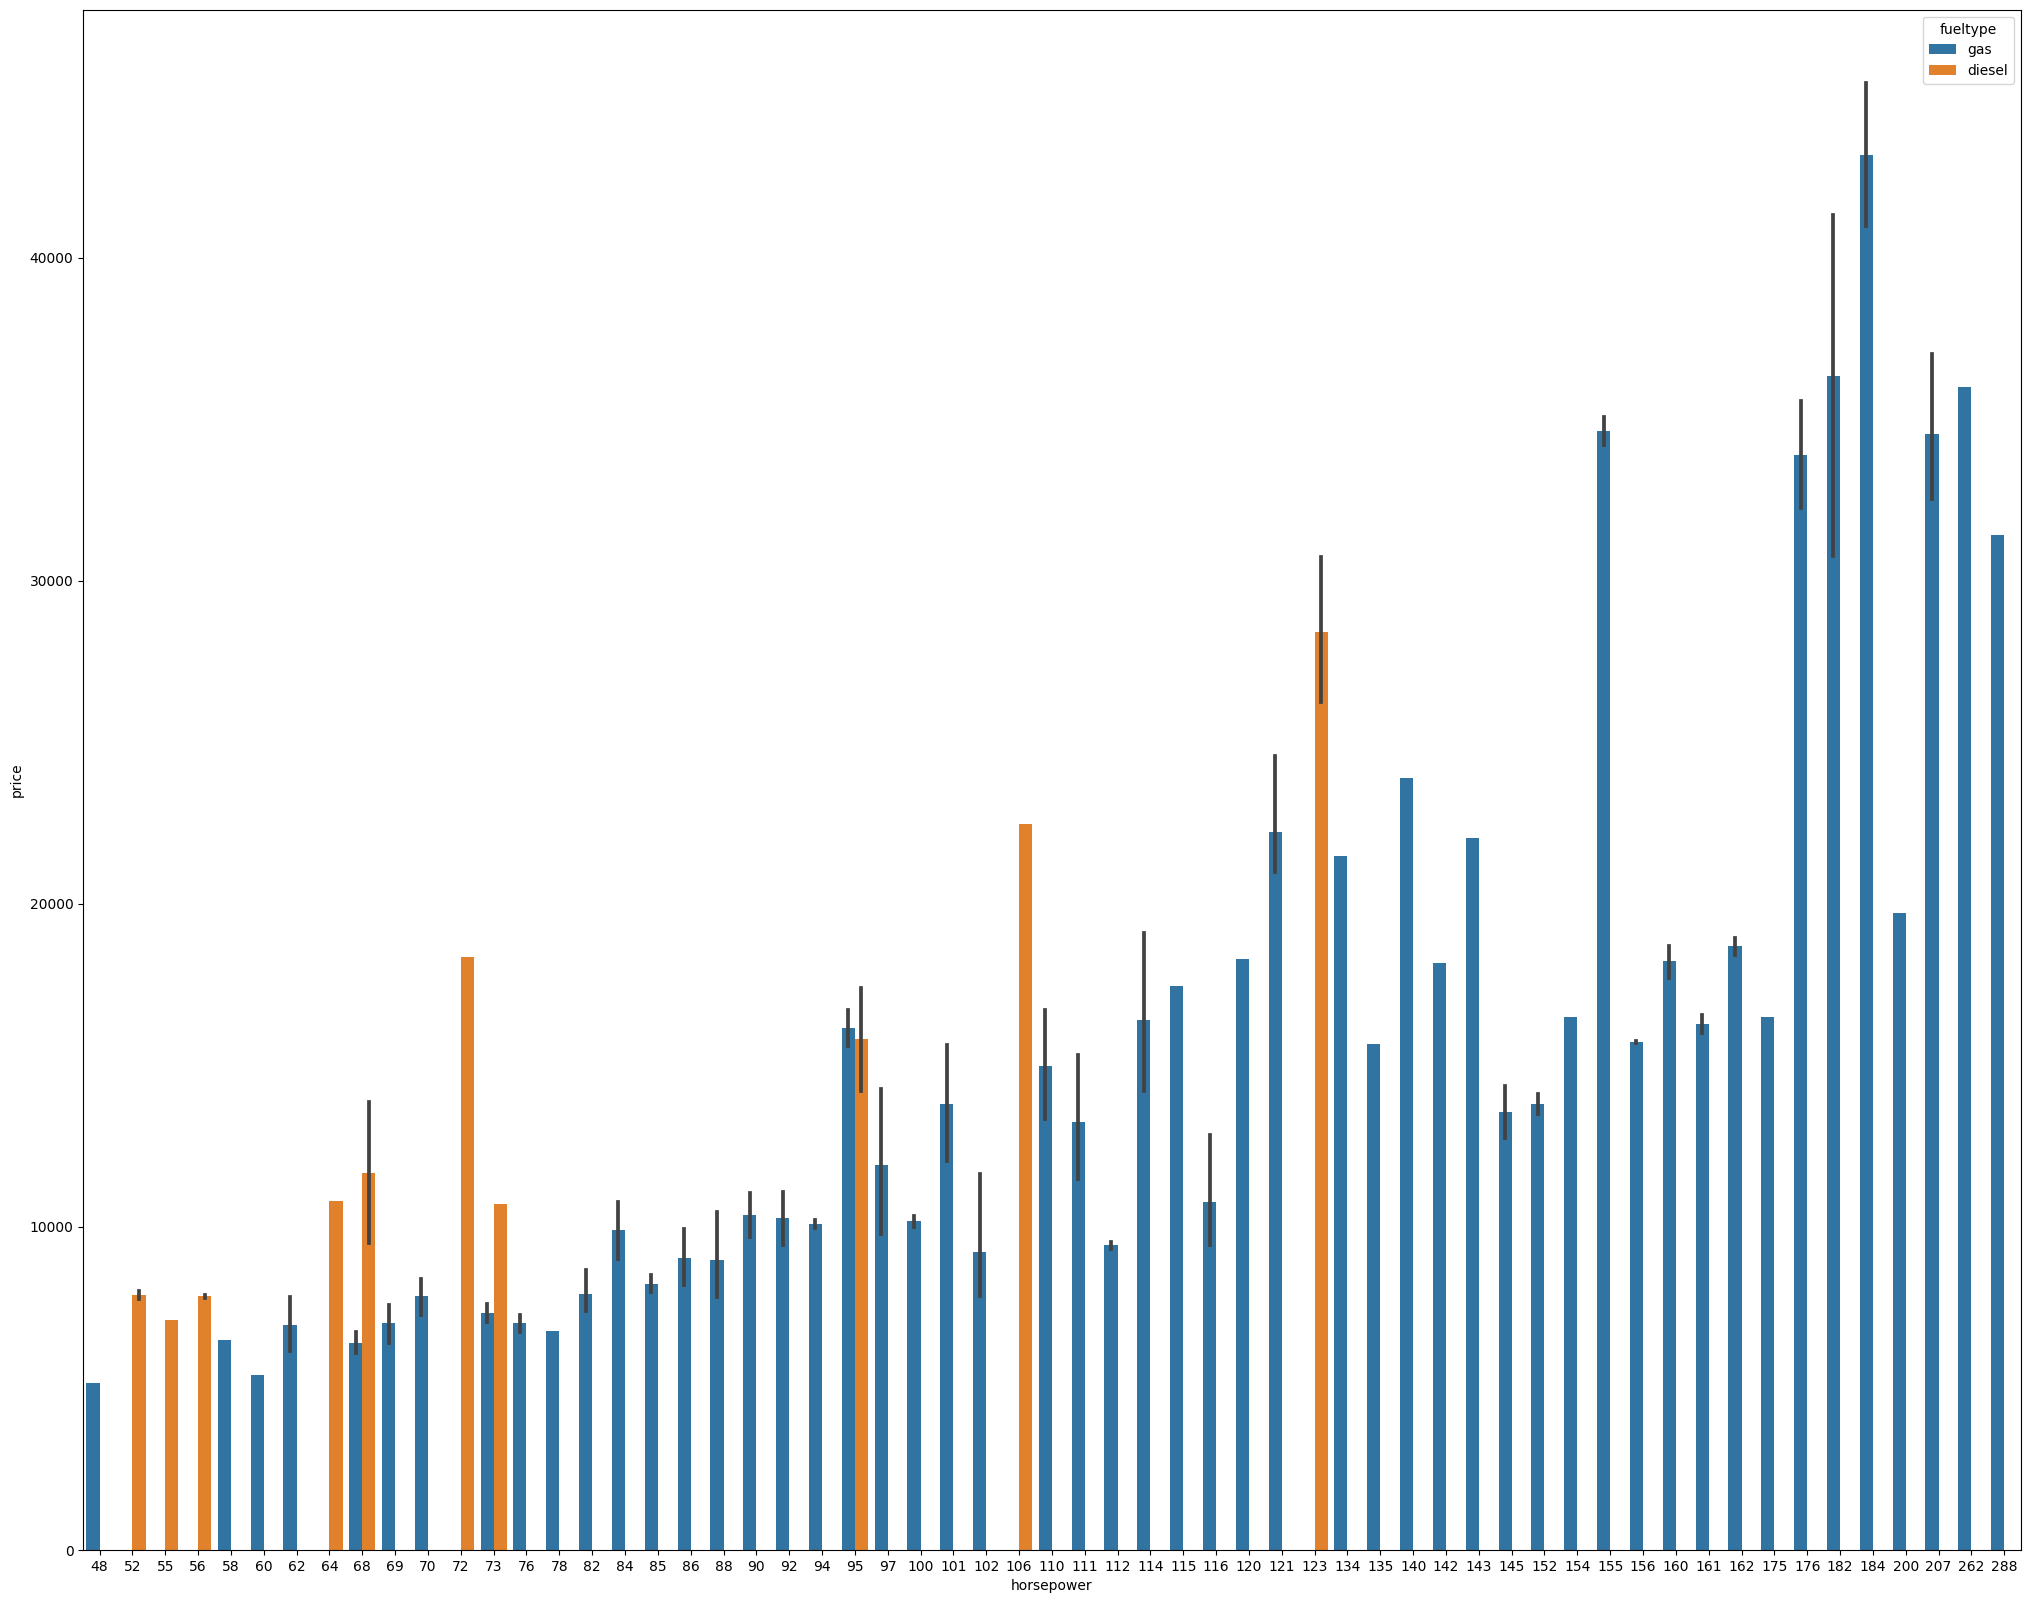

In [344]:
plt.subplots(figsize=(25, 20))
sns.barplot(x='horsepower', y='price', hue='fueltype', data=df);

Распределение цен на автомобили с учетом их лошадиных сил и вида топлива.

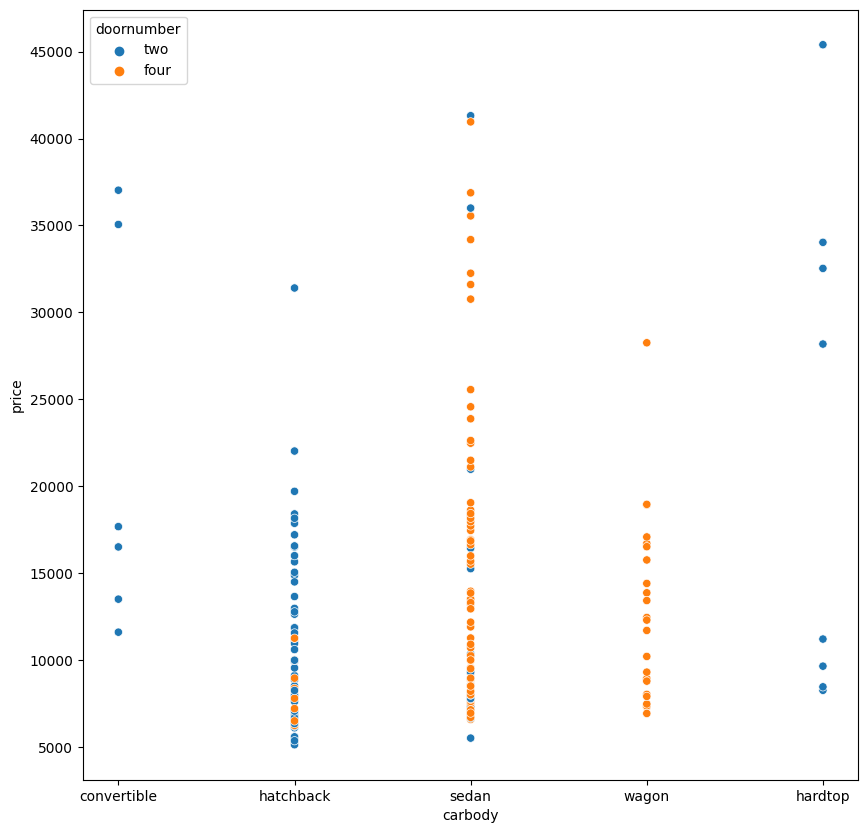

In [345]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'carbody', y = 'price', data=df, hue='doornumber');

Корреляция между признаком кузова автомобиля и числом его дверей. По графику видно влияние этих признаков на цену автомобиля.

##### Преобразование категориальных признаков в численные
Заменим  все категориальные признаки в численные, кроме **CarName**. Его мы удалим.

In [346]:
df['fueltype'].replace(['gas', 'diesel'], [0, 1], inplace=True)
df['aspiration'].replace(['std', 'turbo'], [0, 1], inplace=True)
df['doornumber'].replace(['two', 'four'], [2, 4], inplace=True)
df['carbody'].replace(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], [0, 1, 2, 3, 4], inplace=True)
df['drivewheel'].replace(['rwd', 'fwd', '4wd'], [1, 2, 3], inplace=True)
df['enginelocation'].replace(['front', 'rear'], [1, 2], inplace=True)
df['enginetype'].replace(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], [0, 1, 2, 3, 4, 5, 6], inplace=True)
df['fuelsystem'].replace(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
df['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], [4, 6, 5, 3, 12, 2, 8], inplace=True)

In [347]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,0,1,1,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,0,1,1,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,1,1,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,2,2,1,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,2,3,1,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


##### Удаление ненужных признаков

Признак **car_ID** можно удалить, так как он не важен, присутствуют индексы, начинающиеся с 0, также можно удалить и другие признаки, которые тоже не понадобятся.



In [348]:
df = df.drop(columns=["car_ID",  "CarName", "wheelbase",  "carlength", "carheight", "carwidth", "enginesize", "boreratio"])
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,curbweight,enginetype,cylindernumber,fuelsystem,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,0,1,1,2548,0,4,0,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,0,1,1,2548,0,4,0,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,2,1,1,1,2823,1,6,0,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,4,2,2,1,2337,2,4,0,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,4,2,3,1,2824,2,5,0,3.40,8.0,115,5500,18,22,17450.0


In [349]:
df.shape

(205, 18)

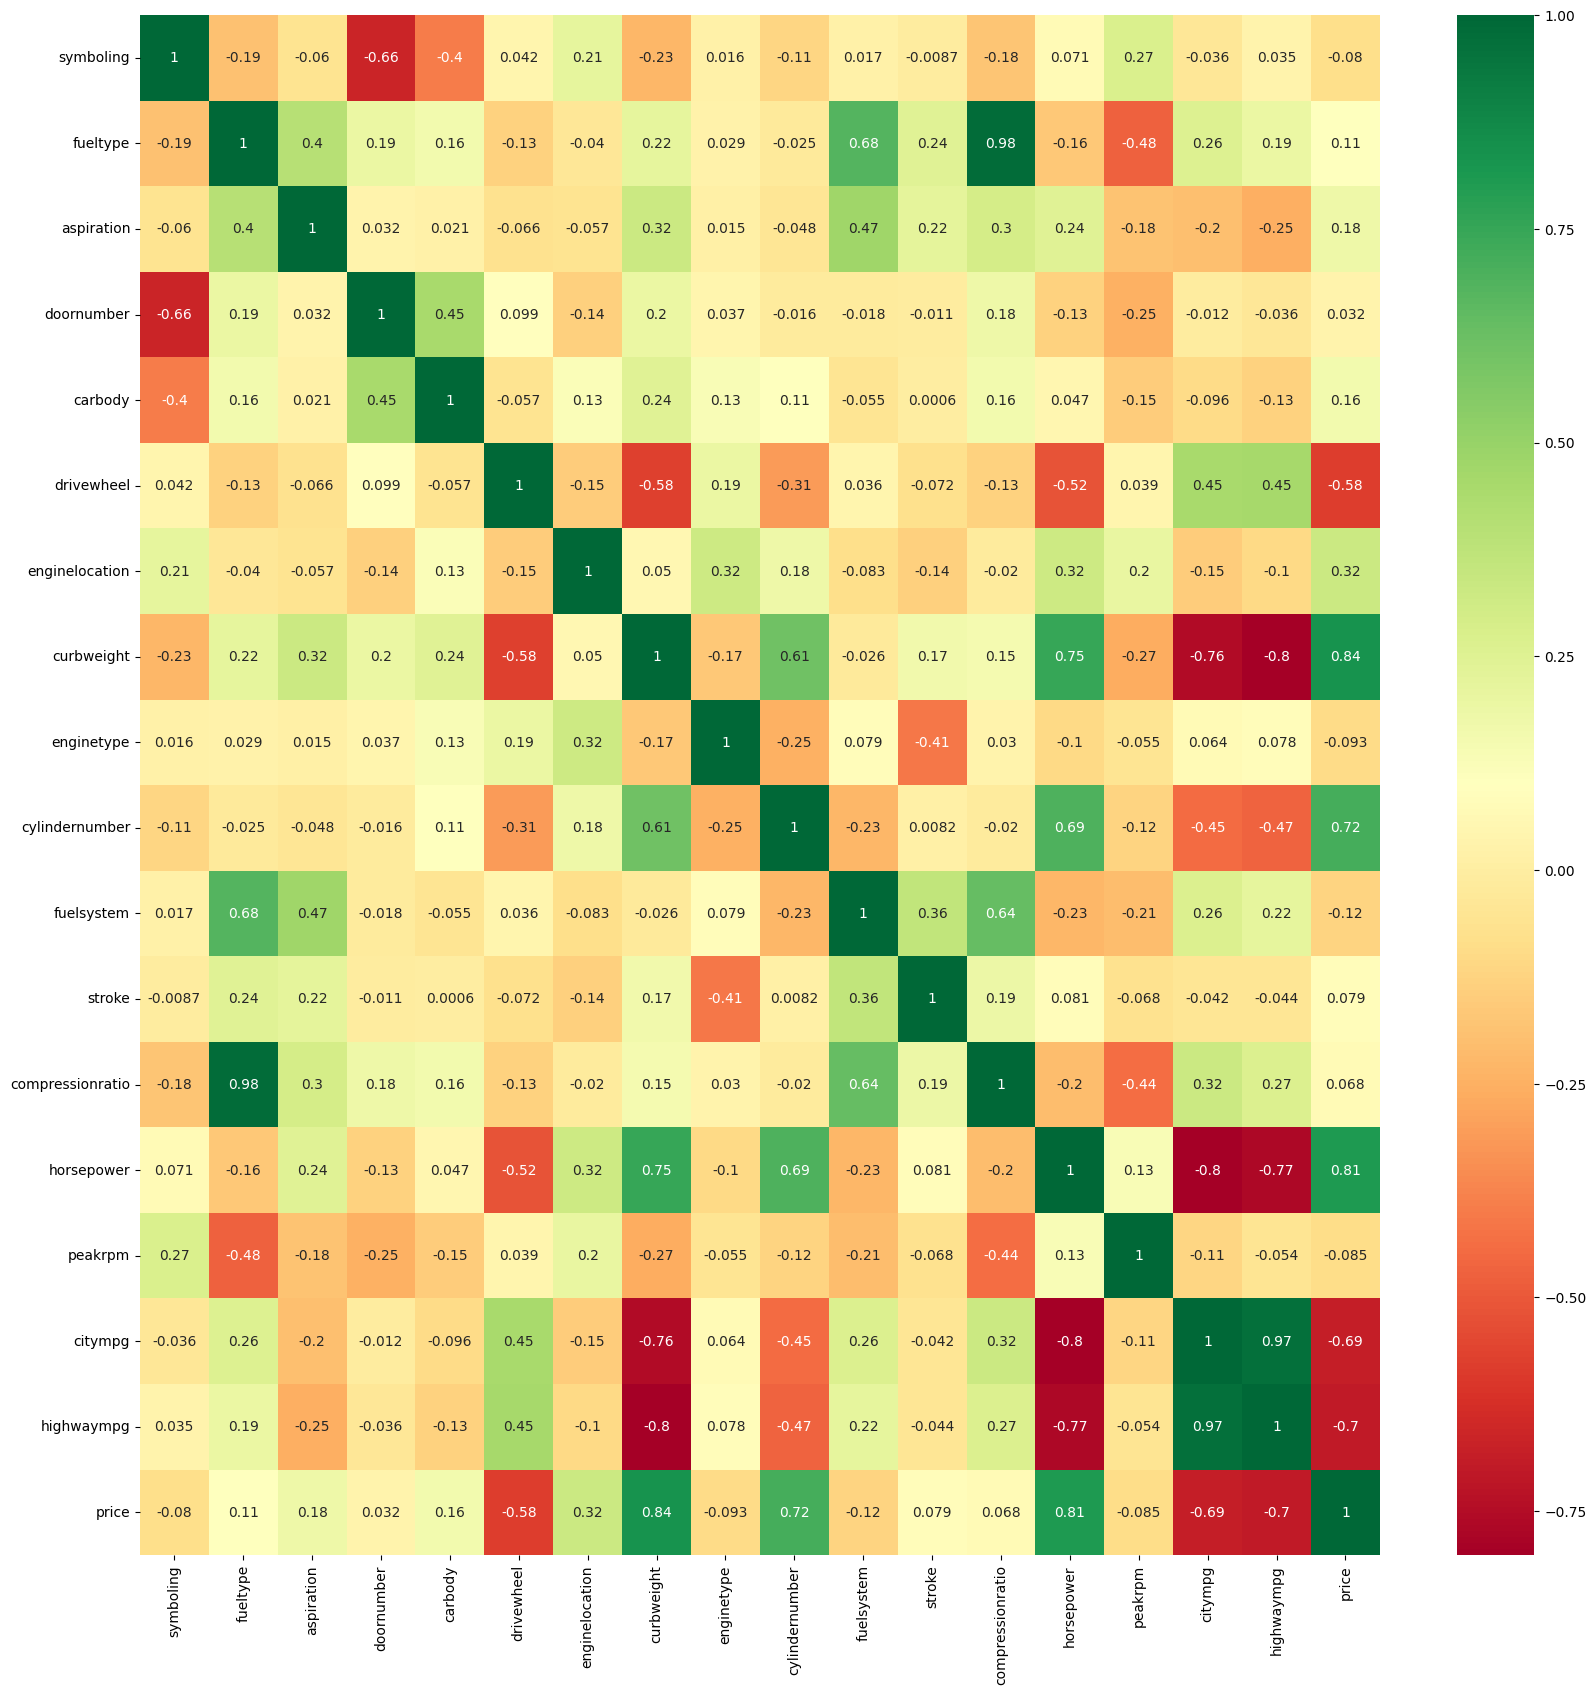

In [350]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn');

Тепловой график корреляции признаков 

##### Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [351]:
from sklearn.model_selection import train_test_split

y = df["price"]
x = df.drop(columns=["price"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

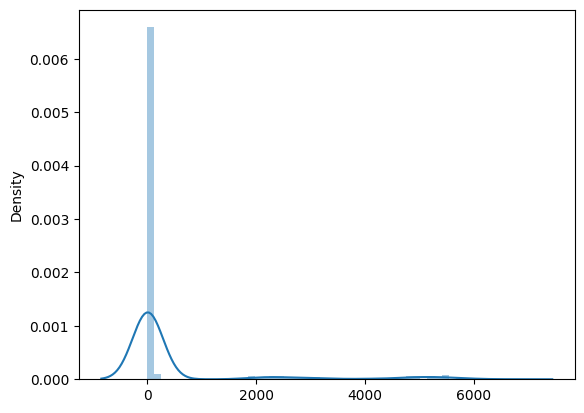

In [352]:
sns.distplot(x_train);

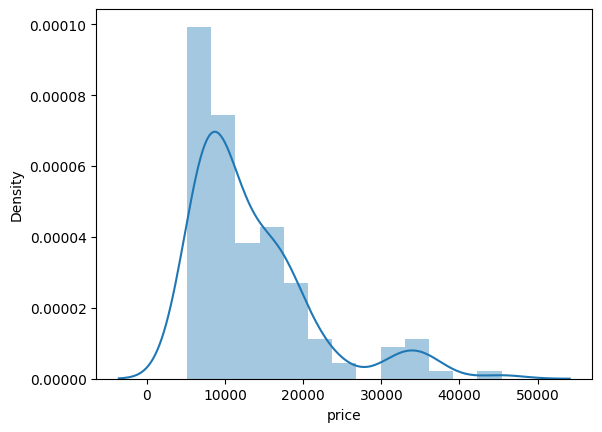

In [353]:
sns.distplot(y_train);

##### Масштабирование данных

In [354]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##### (+1 балл) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE).

In [355]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=7)
labelencoder = LabelEncoder()
y_transform = labelencoder.fit_transform(y_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns)
rfe.fit(x_train_scaled_df, y_transform)
rfe = rfe.fit(x_train_scaled_df, y_transform)

print('Selected features: %s' % list(x_train.columns[rfe.support_]))

Selected features: ['symboling', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg']


In [356]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(x_train_scaled_df, y_transform)

selected_features = list(x_train.columns[rfecv.support_])
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features)

Optimal number of features: 7
Selected features: ['symboling', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg']


##### (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.

Text(0, 0.5, 'CV score')

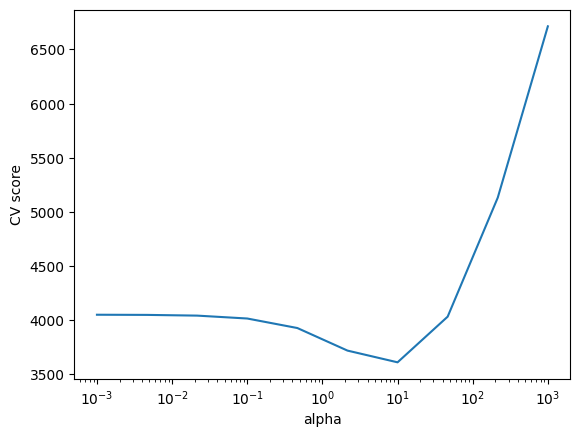

In [357]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_grid = np.logspace(-3, 3, 10)

searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=2)
searcher.fit(x_train_scaled, y_train)

plt.plot(alpha_grid, -searcher1.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")


In [358]:
epsilon_grid = np.logspace(-3, 3, 10)
searcher_e = GridSearchCV(Ridge(), [{"tol": epsilon_grid}], scoring="neg_root_mean_squared_error", cv=2)
searcher_e.fit(x_train_scaled, y_train);

In [359]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 10.0000


In [360]:
best_epsilon = searcher_e.best_params_["tol"]
print("Best epsilon = %.3f" % best_epsilon)

Best epsilon = 0.001


Разобьём данные подобранных признаков данные на обучающую и тестовую выборки и масштабируем их.

In [361]:
df_best = df[['symboling', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg', 'price']]

y = df_best['price']
x = df_best.drop(['price'], axis=1)


x_train_best, x_test_best, y_train_best, y_test_best = train_test_split(x, y, test_size=0.3, random_state=42)


x_train_scaled_best = scaler.fit_transform(x_train_best)
x_test_scaled_best = scaler.transform(x_test_best)

##### Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.

In [362]:
weight = gradient_descent(x_train_scaled_best, y_train_best, best_alpha, best_epsilon)

In [363]:
weight

array([10772.        ,   131.50761417,   -14.36003399,   953.62317871,
       -2127.03435886,    57.60672236,  -716.49454526, -3665.09914156])

получившиеся веса

##### Оценим качество модели  с оптимальными гиперпараметрами и признаками.

In [364]:
def Linear_model(x, weight):
    ones = np.ones((x.shape[0], 1))
    X = np.concatenate((ones,x), axis=1) 
    return np.matmul(X, weight)

In [365]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

y_train_best_model = Linear_model(x_train_scaled_best, weight)
y_test_best_model = Linear_model(x_test_scaled_best, weight)

print("MSE test =", mean_squared_error(y_test_best, y_test_best_model, squared=True))
print("MSE train =", mean_squared_error(y_train_best, y_train_best_model, squared=True), "\n")

print("RMSE test =", mean_squared_error(y_test_best, y_test_best_model, squared=False))
print("RMSE train =", mean_squared_error(y_train_best, y_train_best_model, squared=False), "\n")

print("R^2 test =", r2_score(y_test_best, y_test_best_model))
print("R^2 train =", r2_score(y_train_best, y_train_best_model))



MSE test = 45256536.12345548
MSE train = 30034227.29017157 

RMSE test = 6727.2978322247245
RMSE train = 5480.349194182025 

R^2 test = 0.34680028845507904
R^2 train = 0.5072286146340639


### Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с вашей реализацией.

In [366]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=best_alpha, tol=best_epsilon)
model.fit(x_train_scaled_best, y_train_best);

y_train_ridge = model.predict(x_train_scaled_best)
y_test_ridge = model.predict(x_test_scaled_best)

print("СРАВАНЕНИЕ:")
print("MSE test =", mean_squared_error(y_test_best, y_test_best_model, squared=True))
print("MSE test Ridge =", mean_squared_error(y_test_best, y_test_ridge, squared=True))
print("MSE train =", mean_squared_error(y_train_best, y_train_best_model, squared=True))
print("MSE train Ridge=", mean_squared_error(y_train_best, y_train_ridge, squared=True), "\n")

print("RMSE test =", mean_squared_error(y_test_best, y_test_best_model, squared=False))
print("RMSE test Ridge=", mean_squared_error(y_test_best, y_test_ridge, squared=False))
print("RMSE train =", mean_squared_error(y_train_best, y_train_best_model, squared=False))
print("RMSE train Ridge=", mean_squared_error(y_train_best, y_train_ridge, squared=False), "\n")

print("R^2 test =", r2_score(y_test_best, y_test_best_model))
print("R^2 test Ridge=", r2_score(y_test_best, y_test_ridge))
print("R^2 train =", r2_score(y_train_best, y_train_best_model))
print("R^2 train Ridge=", r2_score(y_train_best, y_train_ridge))

СРАВАНЕНИЕ:
MSE test = 45256536.12345548
MSE test Ridge = 37308574.81138672
MSE train = 30034227.29017157
MSE train Ridge= 22296257.715721898 

RMSE test = 6727.2978322247245
RMSE test Ridge= 6108.074558433837
RMSE train = 5480.349194182025
RMSE train Ridge= 4721.89132824146 

R^2 test = 0.34680028845507904
R^2 test Ridge= 0.4615153435854873
R^2 train = 0.5072286146340639
R^2 train Ridge= 0.6341854346075484


### Повторить тоже самое, но используя кросс-валидацию. Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

In [367]:
results_df = pd.DataFrame(index=['MSE test',
                                 'MSE train',
                                 'RMSE test', 
                                 'RMSE train',
                                 'R2 test', 
                                 'R2 train'])
k_fold = KFold(n_splits=5)
fold_df = x_train_scaled_df[['symboling', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg']]

for fold, (train, test) in enumerate(k_fold.split(X=fold_df , y=y_train_best)):
    weight = gradient_descent(fold_df.iloc[train, :], y_train_best.iloc[train],
                            alpha=best_alpha, epsilon=best_epsilon)

    y_fold_test = Linear_model(fold_df.iloc[test, :], weight)
    y_fold_train = Linear_model(fold_df.iloc[train, :], weight)
    

    results_df.insert(fold, f'Fold {fold + 1}',
                         [mean_squared_error(y_train_best.iloc[test], y_fold_test, squared=True),
                          mean_squared_error(y_train_best.iloc[train], y_fold_train, squared=True),
                          mean_squared_error(y_train_best.iloc[test], y_fold_test, squared=False),
                          mean_squared_error(y_train_best.iloc[train], y_fold_train, squared=False),
                          r2_score(y_train_best.iloc[test], y_fold_test),
                          r2_score(y_train_best.iloc[train], y_fold_train)])
                          

E = results_df.mean(axis=1)
std = results_df.std(axis=1)
results_df["E"] = E
results_df["STD"] = std

results_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,E,STD
MSE test,2.005950e+07,2.552523e+07,3.867263e+07,5.061744e+07,5.372315e+07,3.771959e+07,1.486572e+07
MSE train,3.610393e+07,3.396481e+07,3.272906e+07,3.093841e+07,3.116558e+07,3.298036e+07,2.136115e+06
RMSE test,4.478783e+03,5.052250e+03,6.218732e+03,7.114594e+03,7.329608e+03,6.038793e+03,1.251282e+03
RMSE train,6.008654e+03,5.827934e+03,5.720932e+03,5.562230e+03,5.582614e+03,5.740473e+03,1.848258e+02
R2 test,5.144418e-01,2.453787e-01,3.725578e-01,3.123990e-01,3.942008e-01,3.677956e-01,1.003490e-01
R2 train,4.498798e-01,4.953152e-01,4.608484e-01,4.570725e-01,4.205221e-01,4.567276e-01,2.675738e-02
